# Input data

In [ ]:
# 깃허브 용량 문제로 csv 파일은 올리지 않음
# 필요시 [1_input data 생성] 소스코드에서 csv파일 생성
compound_disease = pd.read_csv('compound_disease.csv')
compound_disease

In [ ]:
import numpy as np
compound_disease_label = list(zip(compound_disease['source'].tolist(),compound_disease['target'].tolist()))

input = []
for data in compound_disease_label:
    input.append(np.vstack([Save_embeddings[data[0]], Save_embeddings[data[1]]]).reshape(120,))

In [ ]:
compound_disease['label'].value_counts()

0.0    211479
1.0      1145
Name: label, dtype: int64

##### -> label bias가 심하다

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

# Classification - LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)

lr.fit(X_train,y_train)	

/Applications/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [33]:
lr.score(X_test,y_test)
															    

0.9946071361384586

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 테스트 세트에 대한 예측
y_pred = lr.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9946071361384586
Precision: 0.5
Recall: 0.005813953488372093
F1 Score: 0.011494252873563218
Confusion Matrix:
[[63442     2]
 [  342     2]]


In [81]:
Model=[]
Precision = []
Recall = []
F1 = []

Model.append('lr')
Precision.append(precision)
Recall.append(recall)
F1.append(f1)

In [84]:
y_test.value_counts()

0.0    63444
1.0      344
Name: label, dtype: int64

#### -> 테스트셋 P 344개

In [85]:
np.unique(lr.predict(X_test), return_counts=True)

(array([0., 1.]), array([63784,     4]))

#### -> 가장 간단한 logistic regression의 경우 label bias가 심해 예측P가 거의 없음

In [86]:
# class_weight='balanced'

lr_class_weight = LogisticRegression(class_weight='balanced', random_state=0)

lr_class_weight.fit(X_train,y_train)	

lr_class_weight.score(X_test,y_test)

/Applications/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8304226500282185

In [87]:
# 테스트 세트에 대한 예측
y_pred = lr_class_weight.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8304226500282185
Precision: 0.027007497064402492
Recall: 0.8691860465116279
F1 Score: 0.05238720981165133
Confusion Matrix:
[[52672 10772]
 [   45   299]]


In [88]:
np.unique(lr_class_weight.predict(X_test), return_counts=True)

(array([0., 1.]), array([52717, 11071]))

In [89]:
Model.append('lr_class_weight')
Precision.append(precision)
Recall.append(recall)
F1.append(f1)

In [90]:
####      예측N   예측P
#### 실제N[[52672 10772]
#### 실제P[   45   299]]


#### -> 실제P:344, 예측P:11071 - FP의 수가 높아 Precision이 매우 낮음

# Classification - svm

In [92]:
from sklearn.svm import SVC

# class_weight='balanced'
svm_class_weight = SVC(class_weight='balanced',random_state=0)
svm_class_weight.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=0)

In [93]:
svm_class_weight.score(X_test, y_test)

0.9953282749106415

In [94]:
np.unique(svm_class_weight.predict(X_test), return_counts=True)

(array([0., 1.]), array([63168,   620]))

In [95]:
# 테스트 세트에 대한 예측
y_pred = svm_class_weight.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9953282749106415
Precision: 0.5370967741935484
Recall: 0.9680232558139535
F1 Score: 0.6908713692946058
Confusion Matrix:
[[63157   287]
 [   11   333]]


In [96]:
Model.append('svm_class_weight')
Precision.append(precision)
Recall.append(recall)
F1.append(f1)

In [97]:
####      예측N   예측P
#### 실제N[[63157   287]
#### 실제P[   11   333]]

#### -> recall은 매우 좋으나, 예측P 620개 중 FP가 287개로 precision 개선이 여전히 필요

# Classification - xgboost

In [99]:
import xgboost as xgb

# class_weight
count_class_0, count_class_1 = np.bincount(compound_disease['label'])
ratio = count_class_0 / count_class_1

# XGBoost 모델 생성 및 학습
xgb_class_weight = xgb.XGBClassifier(scale_pos_weight=ratio,random_state=0)
xgb_class_weight.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = xgb_class_weight.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9957985828055433
Precision: 0.5829694323144105
Recall: 0.7761627906976745
F1 Score: 0.6658354114713216
Confusion Matrix:
[[63253   191]
 [   77   267]]


In [100]:
Model.append('xgb_class_weight')
Precision.append(precision)
Recall.append(recall)
F1.append(f1)

#### -> precision 개선됨, 그러나 실제P 중 FN 개수가 많아져 recall이 낮아짐

# Sampling & svm,xgboost

In [101]:
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링
rus = RandomUnderSampler(random_state=0)
X_rus_resampled, y_rus_resampled = rus.fit_resample(X_train, y_train)


In [102]:
print(len(X_train), len(X_rus_resampled))

148836 1602


In [103]:
np.unique(y_rus_resampled, return_counts=True)

(array([0., 1.]), array([801, 801]))

In [104]:
# 언더샘플링 적용 svm
svm_rus = SVC(random_state=0)
svm_rus.fit(X_rus_resampled, y_rus_resampled)

# 테스트 세트에 대한 예측
y_pred = svm_rus.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9316329090110993
Precision: 0.07165706973768395
Recall: 0.9767441860465116
F1 Score: 0.13351877607788595
Confusion Matrix:
[[59091  4353]
 [    8   336]]


In [105]:
Model.append('svm_rus')
Precision.append(precision)
Recall.append(recall)
F1.append(f1)

In [106]:
# 언더 샘플링 적용 xgboost
xgb_rus = xgb.XGBClassifier(random_state=0)
xgb_rus.fit(X_rus_resampled, y_rus_resampled)

# 테스트 세트에 대한 예측
y_pred = xgb_rus.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9234338747099768
Precision: 0.06362937331795464
Recall: 0.9622093023255814
F1 Score: 0.11936530833032817
Confusion Matrix:
[[58573  4871]
 [   13   331]]


In [107]:
Model.append('xgb_rus')
Precision.append(precision)
Recall.append(recall)
F1.append(f1)

#### -> 언더샘플링 효과 없음

In [108]:
from imblearn.over_sampling import RandomOverSampler

# 오버샘플링
ros = RandomOverSampler(random_state=0)
X_ros_resampled, y_ros_resampled = ros.fit_resample(X_train, y_train)



In [109]:
print(len(X_train), len(X_ros_resampled))

148836 296070


In [110]:
np.unique(y_ros_resampled, return_counts=True)

(array([0., 1.]), array([148035, 148035]))

In [112]:
# 오버샘플링 적용 svm
svm_ros = SVC(random_state=0, probability=True)
svm_ros.fit(X_ros_resampled, y_ros_resampled)

# 테스트 세트에 대한 예측
y_pred = svm_ros.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

In [73]:
Model.append('svm_ros')
Precision.append(precision)
Recall.append(recall)
F1.append(f1)

In [74]:

# 오버 샘플링 적용 
xgb_ros = xgb.XGBClassifier(random_state=0)
xgb_ros.fit(X_ros_resampled, y_ros_resampled)

# 테스트 세트에 대한 예측
y_pred = xgb_ros.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9963002445601054
Precision: 0.6227272727272727
Recall: 0.7965116279069767
F1 Score: 0.6989795918367346
Confusion Matrix:
[[63278   166]
 [   70   274]]


In [75]:
Model.append('xgb_ros')
Precision.append(precision)
Recall.append(recall)
F1.append(f1)

In [111]:
Learning = pd.DataFrame({'Model':Model,'Precision':Precision,'Recall':Recall, 'F1':F1})
Learning

,Model,Precision,Recall,F1
0,lr,0.500000,0.005814,0.011494
1,lr_class_weight,0.027007,0.869186,0.052387
2,svm_class_weight,0.537097,0.968023,0.690871
3,xgb_class_weight,0.582969,0.776163,0.665835
4,svm_rus,0.071657,0.976744,0.133519
5,xgb_rus,0.063629,0.962209,0.119365


#### -> 오버샘플링, svm이 가장 좋은 성능을 보인다

# 모델 선택 - 가장 높은 F1 스코어와 해당하는 임계값으로 예측 조정

In [79]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# svm_ros 모델에서 예측된 확률 값
y_proba = svm_ros.predict_proba(X_test)[:, 1]

# Precision-Recall 곡선 생성
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# F1 스코어 계산
f1_scores = 2 * (precision * recall) / (precision + recall)

# 가장 높은 F1 스코어와 해당하는 임계값
best_f1_score = np.max(f1_scores)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"가장 높은 F1 스코어: {best_f1_score:.4f} (임계값: {best_threshold:.4f})")


AttributeError: predict_proba is not available when  probability=False

In [ ]:
from sklearn.metrics import classification_report

# 임계값 조정
threshold = 0.7634  
y_pred_adjusted = (y_proba > threshold).astype(int)

# 조정된 예측
print(classification_report(y_test, y_pred_adjusted))

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     63444
         1.0       0.78      0.70      0.74       344

    accuracy                           1.00     63788
   macro avg       0.89      0.85      0.87     63788
weighted avg       1.00      1.00      1.00     63788

Accuracy: 0.9973349219288894
Precision: 0.7824675324675324
Recall: 0.7005813953488372
F1 Score: 0.7392638036809815
Confusion Matrix:
[[63377    67]
 [  103   241]]


# ROC Curve

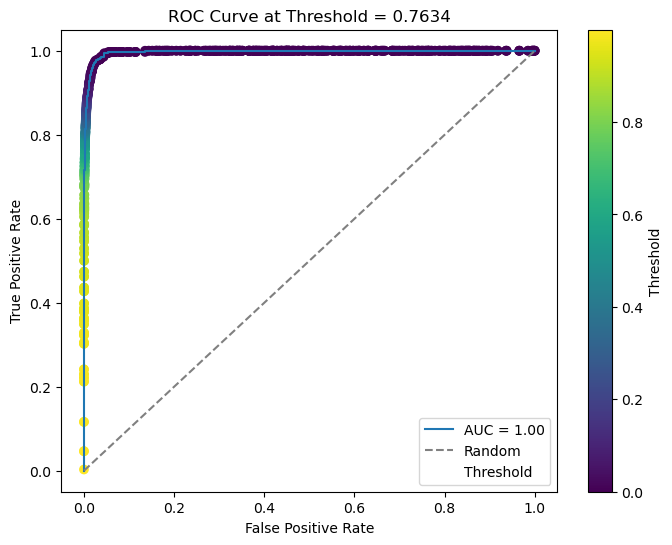

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# AUC 계산
auc = roc_auc_score(y_test, y_proba)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.scatter(fpr, tpr, c=thresholds, cmap='viridis', label='Threshold', marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve at Threshold = 0.7634')
plt.legend()
plt.colorbar(label='Threshold')
plt.show()

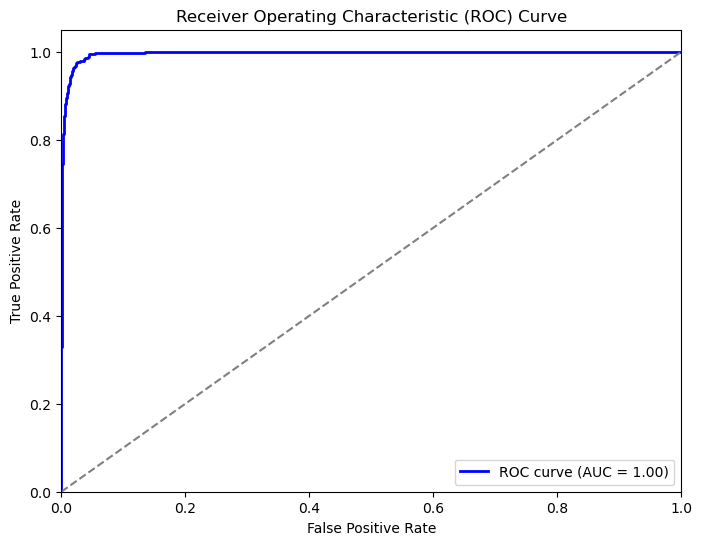

In [ ]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt

y_probs = svm_ros.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = sm.roc_curve(y_test, y_pred_adjusted)

# AUC (Area Under the ROC Curve) 계산
auc = sm.roc_auc_score(y_test, y_pred_adjusted)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 약물재창출

In [ ]:
#Disease::DOID:1612 = breast cancer
import numpy as np
input2 = []
ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
for data in compound_disease_label:
    if data[1]=='Disease::DOID:1612': 
        input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(120,))
        ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)

# XGBoost 모델에서 예측된 확률 값
prediction = xg3.predict_proba(input2)[:, 1]

df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
df['label'] = prediction

# 예측한 결과, 'label' 열 값이 1인 행 출력
selected_rows = df[df['label'] == 1]

# 정답 label이 1인 conpound 출력
rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
rows_list = rows['source'].tolist()

compound_list = []
for i in selected_rows['source']:
    if i not in rows_list:
        compound_list.append(i)

#에측결과에서 실제결과 값을 제외한 결과
nodes[nodes['id'].isin(compound_list)]

/var/folders/h7/80308m4j7kg6zp9y8km0_ydm0000gn/T/ipykernel_42629/1419689956.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = prediction


,id,name,kind


In [ ]:
# 테스트 세트에 대한 예측 확률 얻기
y_probabilities = xg3.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# 'label_prob' 열에 예측 확률 추가
df['label_prob'] = y_probabilities.round(4)

# label_prob를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='label_prob', ascending=False)

df_sorted

/var/folders/h7/80308m4j7kg6zp9y8km0_ydm0000gn/T/ipykernel_42629/2087309696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_prob'] = y_probabilities.round(4)


,source,target,label,label_prob
141168,Compound::DB01185,Disease::DOID:1612,9.990056e-01,0.9990
150895,Compound::DB01259,Disease::DOID:1612,9.989334e-01,0.9989
179254,Compound::DB04845,Disease::DOID:1612,9.987736e-01,0.9988
202270,Compound::DB08871,Disease::DOID:1612,9.986876e-01,0.9987
43898,Compound::DB00445,Disease::DOID:1612,9.985880e-01,0.9986
...,...,...,...,...
53762,Compound::DB00524,Disease::DOID:1612,5.481537e-06,0.0000
89519,Compound::DB00792,Disease::DOID:1612,4.961039e-05,0.0000
140894,Compound::DB01183,Disease::DOID:1612,7.714259e-06,0.0000
81025,Compound::DB00728,Disease::DOID:1612,3.587482e-07,0.0000


In [ ]:
# source 열의 값이 rows_list에 있는 행을 삭제
df_sorted = df_sorted[~df_sorted['source'].isin(rows_list)]

# label_prob 값이 큰 상위 10개의 행 출력
top_10_rows = df_sorted.nlargest(10, 'label_prob')
top_10_rows

,source,target,label,label_prob
82806,Compound::DB00741,Disease::DOID:1612,0.989126,0.9891
87053,Compound::DB00773,Disease::DOID:1612,0.947384,0.9474
68421,Compound::DB00635,Disease::DOID:1612,0.874661,0.8747
112809,Compound::DB00970,Disease::DOID:1612,0.764458,0.7645
120892,Compound::DB01030,Disease::DOID:1612,0.748054,0.7481
140620,Compound::DB01181,Disease::DOID:1612,0.699791,0.6998
102945,Compound::DB00894,Disease::DOID:1612,0.648202,0.6482
195009,Compound::DB06772,Disease::DOID:1612,0.642905,0.6429
142675,Compound::DB01196,Disease::DOID:1612,0.569775,0.5698
133770,Compound::DB01128,Disease::DOID:1612,0.544661,0.5447


In [ ]:
top_10_rows['source'] = top_10_rows['source'].map(nodes.set_index('id')['name'])
top_10_rows['target'] = 'breast cancer'
top_10_rows

,source,target,label,label_prob
82806,Hydrocortisone,breast cancer,0.989126,0.9891
87053,Etoposide,breast cancer,0.947384,0.9474
68421,Prednisone,breast cancer,0.874661,0.8747
112809,Dactinomycin,breast cancer,0.764458,0.7645
120892,Topotecan,breast cancer,0.748054,0.7481
140620,Ifosfamide,breast cancer,0.699791,0.6998
102945,Testolactone,breast cancer,0.648202,0.6482
195009,Cabazitaxel,breast cancer,0.642905,0.6429
142675,Estramustine,breast cancer,0.569775,0.5698
133770,Bicalutamide,breast cancer,0.544661,0.5447


In [ ]:
# # top_10_rows를 CSV 파일로 저장
# top_10_rows.to_csv('xgboost_drug2.csv', index=False)

# -> xg3 모델에 질병이 breast cancer인 input2를 넣었을 때, label이 1이라고 예측되는 결과에 정답 label이 1인 행을 제외하고 label_prob값이 높은 상위 10개를 출력함.

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test =\
#     train_test_split(input, compound_disease['label'], test_size=0.3, random_state=42, stratify=compound_disease['label'])

# X_subtrain, X_val, y_subtrain, y_val =\
#     train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# from sklearn.svm import SVC

# svm = SVC(class_weight='balanced', kernel='rbf', probability=True)  # kernel SVM
# svm.fit(X_subtrain, y_subtrain)

In [ ]:
# from sklearn.metrics import precision_score, recall_score, classification_report

# y_proba = svm.predict_proba(X_test)[:, 1]

# # 임계값을 조정
# threshold = 0.3  # 임계값 설정
# y_pred_adjusted = (y_proba > threshold).astype(int)

# # 조정된 예측
# print(classification_report(y_test, y_pred_adjusted))

In [ ]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_adjusted)
# print(accuracy)

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming you have already imported necessary libraries and executed the previous code

# # Get the predicted probabilities for the positive class
# y_proba = svm.predict_proba(X_test)[:, 1]

# # Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# # Compute the area under the ROC curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


In [ ]:
# #Disease::DOID:1612 = breast cancer
# import numpy as np
# input2 = []
# ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
# for data in compound_disease_label:
#     if data[1]=='Disease::DOID:1612': 
#         input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(120,))
#         ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)

# threshold = 0.3        
# prediction = ((svm.predict_proba(input2)[:, 1]) > threshold).astype(int)

# df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
# df['label'] = prediction

# # 예측한 결과, 'label' 열 값이 1인 행 출력
# selected_rows = df[df['label'] == 1]

# # 정답 label이 1인 conpound 출력
# rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
# rows_list = rows['source'].tolist()

# compound_list = []
# for i in selected_rows['source']:
#     if i not in rows_list:
#         compound_list.append(i)

# #에측결과에서 실제결과 값을 제외한 결과
# nodes[nodes['id'].isin(compound_list)]

In [ ]:
# # 테스트 세트에 대한 예측 확률 얻기
# y_probabilities = svm.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# # 'label_prob' 열에 예측 확률 추가
# df['label_prob'] = y_probabilities.round(4)

# # label_prob를 기준으로 데이터프레임 정렬
# df_sorted = df.sort_values(by='label_prob', ascending=False)

# df_sorted

In [ ]:
# # source 열의 값이 rows_list에 있는 행을 삭제
# df_sorted = df_sorted[~df_sorted['source'].isin(rows_list)]

# # label_prob 값이 큰 상위 10개의 행 출력
# top_10_rows = df_sorted.nlargest(10, 'label_prob')
# top_10_rows

In [ ]:
# top_10_rows['source'] = top_10_rows['source'].map(nodes.set_index('id')['name'])
# top_10_rows['target'] = 'breast cancer'
# top_10_rows

In [ ]:
# # top_10_rows를 CSV 파일로 저장
# top_10_rows.to_csv('svm_drug.csv', index=False)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import precision_score, recall_score, classification_report
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import make_pipeline

# # Assuming you have input and compound_disease['label'] defined

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     input, compound_disease['label'], test_size=0.3, random_state=42, stratify=compound_disease['label']
# )

# # Split the training data into subtrain and validation sets
# X_subtrain, X_val, y_subtrain, y_val = train_test_split(
#     X_train, y_train, test_size=0.3, random_state=42
# )

# # Create a pipeline with oversampling and SVM
# pipeline = make_pipeline(RandomOverSampler(random_state=42), SVC(class_weight='balanced', kernel='rbf', probability=True))

# # Fit the model on the training data with oversampling
# pipeline.fit(X_subtrain, y_subtrain)

# # Get the predicted probabilities on the test set
# y_proba = pipeline.predict_proba(X_test)[:, 1]

# # Adjust the threshold
# threshold = 0.3
# y_pred_adjusted = (y_proba > threshold).astype(int)

# # Display the classification report
# print(classification_report(y_test, y_pred_adjusted))

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# # Compute the area under the ROC curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

In [ ]:
# #Disease::DOID:1612 = breast cancer
# import numpy as np
# input2 = []
# ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
# for data in compound_disease_label:
#     if data[1]=='Disease::DOID:1612': 
#         input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(120,))
#         ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)

# threshold = 0.3        
# prediction = ((svm.predict_proba(input2)[:, 1]) > threshold).astype(int)

# df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
# df['label'] = prediction

# # 예측한 결과, 'label' 열 값이 1인 행 출력
# selected_rows = df[df['label'] == 1]

# # 정답 label이 1인 conpound 출력
# rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
# rows_list = rows['source'].tolist()

# compound_list = []
# for i in selected_rows['source']:
#     if i not in rows_list:
#         compound_list.append(i)

# #에측결과에서 실제결과 값을 제외한 결과
# nodes[nodes['id'].isin(compound_list)]

In [ ]:
# # 테스트 세트에 대한 예측 확률 얻기
# y_probabilities = svm.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# # 'label_prob' 열에 예측 확률 추가
# df['label_prob'] = y_probabilities.round(4)

# # label_prob를 기준으로 데이터프레임 정렬
# df_sorted = df.sort_values(by='label_prob', ascending=False)

# df_sorted

In [ ]:
# # source 열의 값이 rows_list에 있는 행을 삭제
# df_sorted = df_sorted[~df_sorted['source'].isin(rows_list)]

# # label_prob 값이 큰 상위 10개의 행 출력
# top_10_rows = df_sorted.nlargest(10, 'label_prob')
# top_10_rows